# Fall 2016 tutoring center sign-in data
This is an auto-generated report on student drop-in and special review session visits to the Economics Tutoring center. 
Every student visit is logged and this new report is auto-generated nightly a [jupyter notebook](http://jupyter.org/). The version you are now reading may have the code cells hidden. 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime
import seaborn as sns
import os
import glob as glob
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
export_files = glob.iglob(r'mysite/scripts/sign_in_exports/latest_export.csv')
#export_files = glob.iglob(r'D:\Users\jconning\Dropbox\sign_in_exports\*.csv')
#export_files = glob.iglob(r'latest_export.csv')

#sort by most recently updated export
newest = max(export_files, key=os.path.getmtime)
df = pd.read_csv(newest)

update_date_unix = os.path.getmtime(newest)
update_date = datetime.fromtimestamp(update_date_unix)
print("This report was updated on: " + str(update_date.strftime("%b %d %Y %H:%M:%S")))

This report was updated on: Mar 14 2016 13:08:21


In [4]:
df['timestamp'] = pd.to_datetime(df.Date + ' ' + df.Time)
df = df.set_index(pd.DatetimeIndex(df.timestamp))

df['day'] = [date.dayofweek for date in df.index]
df['hour']= [date.hour for date in df.index]


#### The most popular days of the week:

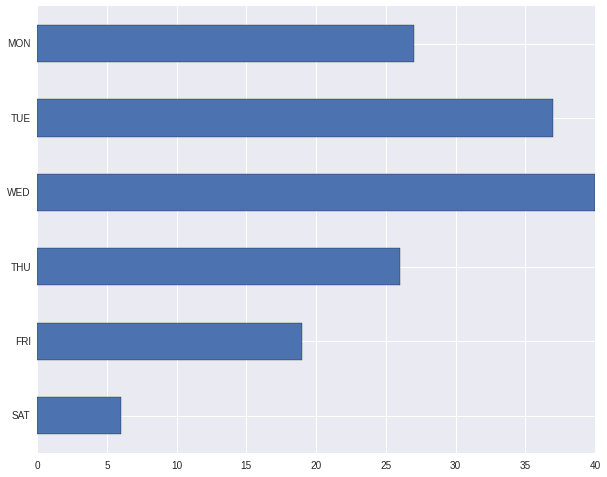

In [5]:
grouped = df.groupby('day').size().sort_index(ascending= False)

#rename integer day of week index by text day of week
weekmask =['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
grouped.index = [weekmask[date] for date in grouped.index]

grouped.plot(kind='barh')

In [6]:
 
#Then reset_index to convert the (day,hour) multindex into a dataframe with columns 
#for day, hour and visits.  After all that use a (groupby) pivot table to create 
#the df_heatmap dataframe with hour rows and day columns. Exclude visits that might 
#have been misclassified as having happened outside tutoring hours (8am-9pm).  
#Note: these get created when no hour was indicated on the sign-in.

In [7]:
#Group by day and hour to count the number of visits in each day-hour cell. 
dfu = pd.DataFrame(df.groupby([df.day,df.hour]).size())
dfu.reset_index(inplace=True) 
dfu.columns = ['hour','day', 'visits']

In [8]:
df_heatmap = dfu.pivot('day','hour','visits').fillna(0)
df_heatmap = df_heatmap.loc[8:21,]

#rename integer day of week index by text day of week
weekmask =['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
df_heatmap.columns = [weekmask[date] for date in df_heatmap.columns]

#### Heatmap showing most busy hours 
The tutoring center is open Monday to Saturday but holds ocassional Sunday review sessions.

/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


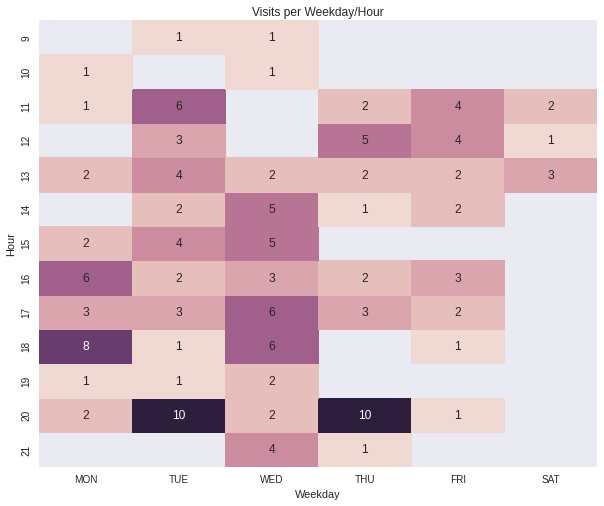

In [9]:
# Heatmap ignores values in mask. 
mask = ( df_heatmap ==0)
sns.heatmap(df_heatmap, annot=True, mask = mask,cbar=False)
plt.ylabel('Hour')
plt.xlabel('Weekday')
plt.title('Visits per Weekday/Hour')
plt.show()

## Cumulative visits by date

In [34]:
day_count = df.groupby('Date').size()
day_countD = df[ df['Purpose'] == 'Drop-in' ].groupby('Date').size()

df_count = pd.DataFrame({'Total': day_count})
df_countD = pd.DataFrame({'Drop In': day_countD})
df_day = pd.concat([df_count, df_countD], axis=1)


In [38]:
idx = pd.date_range(df_day.index.min(), df_day.index.max())
df_day.index = pd.DatetimeIndex(df_day.index)
df_day = df_day.reindex(idx,fill_value=0)
df_day = df_day.fillna(value=0)

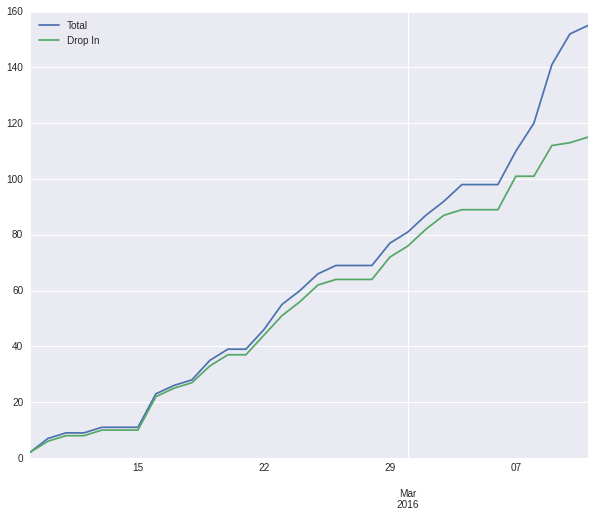

In [39]:
df_day.cumsum().plot()
plt.show()

## Visits by course number

In [13]:
byCourse = df.groupby(['Catalog Num'])
df_Course = byCourse.size().sort_values(ascending=False)
df_Course

Catalog Num
20000    43
10000    22
22100    19
30000    17
36500     9
32100     9
20100     9
34500     7
33700     5
30100     5
34100     2
34000     2
4031      2
70300     1
21000     1
dtype: int64

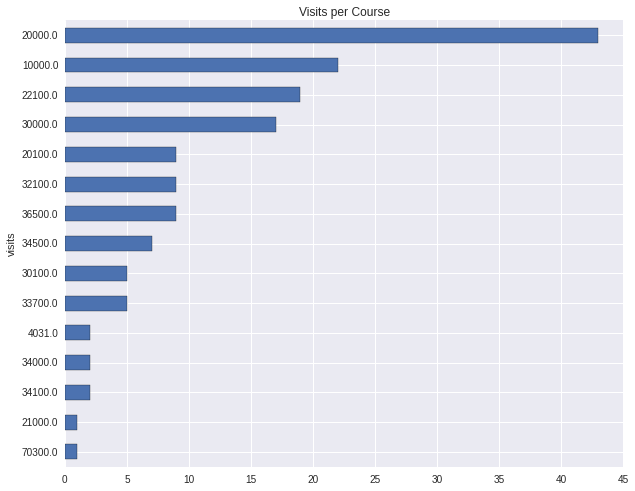

In [14]:
df_Course.sort_values().plot(kind='barh')
plt.ylabel("visits")
plt.title('Visits per Course')
plt.show()

## Visits by course section and instructor

In [15]:
byCourseProf = df.groupby(['Catalog Num','Instructor'])
df_CourseProf = byCourseProf.size().sort_values(ascending=False)
df_CourseProf

Catalog Num  Instructor         
20000        Jonathan Conning       34
22100        Richard Nugent         18
10000        Karna Basu             12
30000        Ingmar Nyman           11
36500        Henry Ma                8
10000        Timothy Goodspeed       7
20100        Nicholas Bauer          6
32100        Beila Leboeuf           6
30000        Devra Golbe             6
34500        Nathaniel Wright        5
33700        Tamara Gurevich         5
30100        Andrew Silverstein      5
20000        Howard Chernick         5
             Randall Filer           4
10000        Richard Nugent          3
32100        Orkideh Gharehgozli     3
4031         Mark Levitan            2
20100        Ye Wang                 2
34000        Nathaniel Wright        2
34100        Huy Nguyen              2
34500        Huy Nguyen              2
20100        Terence Agbeyegbe       1
21000        Gowun Park              1
22100        Olga Guska              1
36500        Ye Wang           

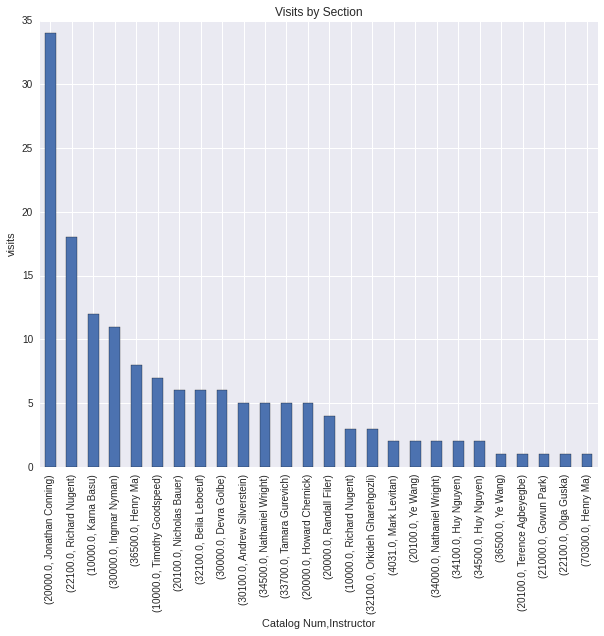

In [16]:
df_CourseProf.sort_values(ascending=False).plot(kind='bar')
plt.ylabel("visits")
plt.title('Visits by Section')
plt.ylabel("visits")
plt.show()